In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data.csv', header= None)

#day of week, time, temperature, humidity, light on/off, aircon on/off, aircon temp, room, class
df.columns = ["day", "hour", "minute", "temperature", "humidity", "light_state", "aircon_state", "aircon_temp", "room", "class"]

# tentatively reduced to 5 features for POC
y = df['class']
X = df.drop('class', axis = 1)
X = X.drop('minute', axis = 1)
X = X.drop('aircon_temp', axis = 1)
X = X.drop('room', axis = 1)
X = X.drop('humidity', axis = 1)

X

,day,hour,temperature,light_state,aircon_state
0,5,0,29.5,1,0
1,5,0,29.0,1,0
2,5,0,28.0,1,0
3,5,0,29.0,1,0
4,5,0,27.0,1,0
...,...,...,...,...,...
129019,4,23,31.0,1,0
129020,4,23,28.5,1,0
129021,4,23,28.5,1,0
129022,4,23,30.0,1,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Scalers improved the accuracy but don't really know how to use it on the individual datas to test yet
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

print(X_test)

        day  hour  temperature  light_state  aircon_state
117039    5    18         34.0            0             0
92809     5    12         33.0            1             0
101694    4     5         30.5            1             1
33199     4    13         32.0            0             1
50177     3    10         32.5            0             1
...     ...   ...          ...          ...           ...
117436    1    12         32.5            0             0
64774     6    19         34.0            0             0
5797      3     6         29.0            0             0
41092     3     8         34.0            0             1
24349     6     2         30.0            1             0

[25805 rows x 5 columns]


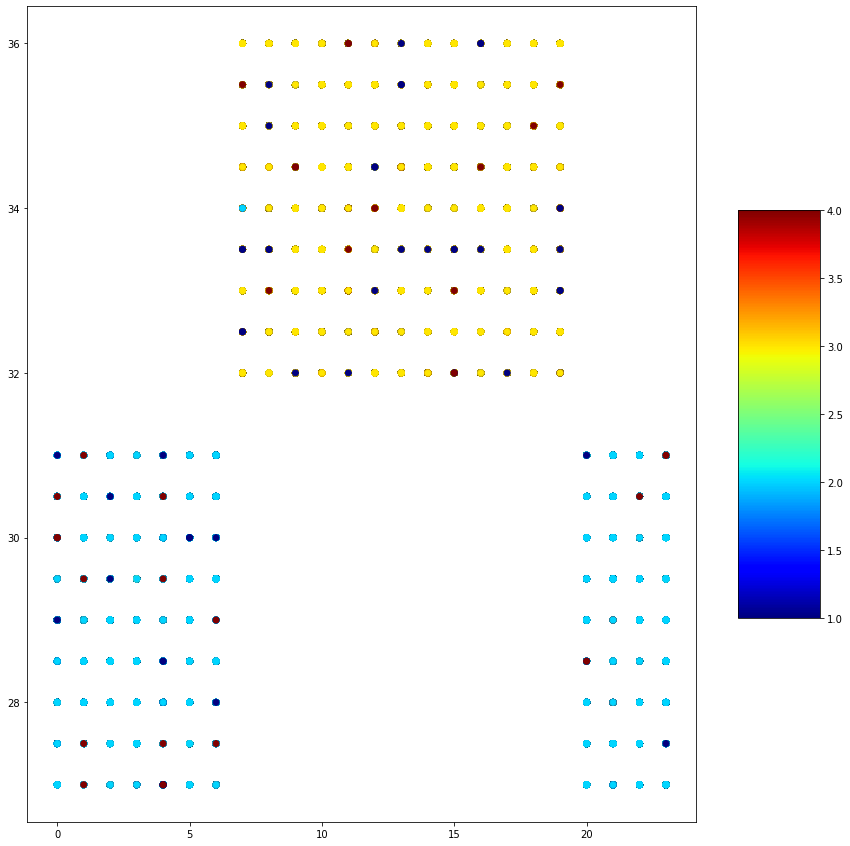

In [24]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize = (15, 15))
ax = plt.axes()
y_train.replace({"nanl": 1,"nagl": 2,"ganl": 3,"gagl": 4},inplace= True)
sctt = ax.scatter(X_train["hour"], X_train["temperature"],c =y_train , cmap='jet')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# proof of concept below
wedh = classifier.predict([[6,10,32.0,0,1]])
print(wedh)

wddh = classifier.predict([[3,10,32.0,0,1]])
print(wddh)

wddc = classifier.predict([[3,10,26.0,0,1]])
print(wddc)

wenh = classifier.predict([[6,23,27.0,0,1]])
print(wenh)

['ganl']
['ganl']
['gagl']
['ganl']


C:\Users\xuezh\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\xuezh\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\xuezh\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\xuezh\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

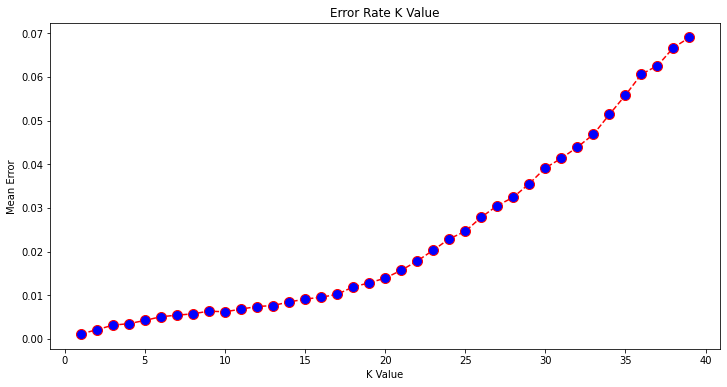

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')